In [13]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from user_agents import parse
import mplcursors


In [14]:
# Import the data from the json file
# Data is in format {},{},{},... and in a text file

# Read the data from the file
with open('../../Dataset/build_dataset.txt') as f:
    data = f.readlines()

# Convert the data to a list of dictionaries
data = [json.loads(x.strip()) for x in data]

In [15]:
import matplotlib.pyplot as plt

# Function to create a histogram with interactive hover feature
def create_histogram(data, title, xlabel, ylabel='Visitors', color='darkblue'):
    # Create a figure and bar plot
    fig, ax = plt.subplots(figsize=(12, 10))
    bars = ax.bar(data.keys(), data.values(), color=color)

    # Add a title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Hide the x-ticks
    ax.set_xticks([])

    # Use mplcursors to add interactive hover tooltips to the bars
    cursor = mplcursors.cursor(bars, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(f'Visitors: {data[sel.target.index]}'))

    # Show the plot
    plt.show()



In [20]:
# Function to get the browser from the user agent
def get_browser(data):
     
    browsers = []
    for record in data:
        if 'visitor_useragent' in record:
            user_agent = parse(record['visitor_useragent'])
            # Just get the main browser family name without version or device
            browser_family = user_agent.browser.family
            # For more grouping, you can add conditions here to group by general browser type
            if 'Mobile' in browser_family or 'Tablet' in browser_family or 'iOS' in browser_family or 'WebView' in browser_family or 'WebKit' in browser_family:
                browser_family = browser_family.replace('Mobile', '').replace('Tablet', '').replace('iOS', '').replace('WebView', '').replace('WebKit', '')
            #trim whitespace
            browser_family = browser_family.strip()
            browsers.append(browser_family)
            browser_counts = Counter(browsers)
            sorted_browser_counts = sorted(browser_counts.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_browser_counts[:10])

browser_counts = get_browser(data)
create_histogram(browser_counts, 'Top 10 Browsers', 'Browser')


TypeError: unhashable type: 'slice'

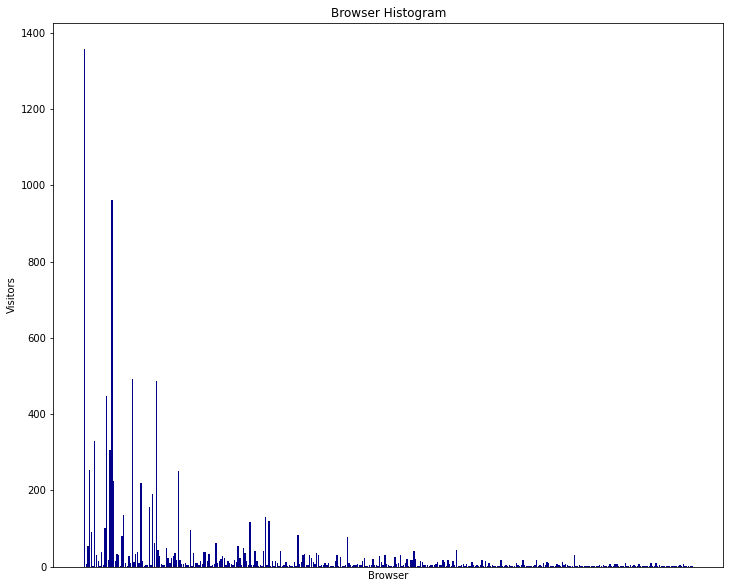

In [ ]:
def get_all_browsers():
    browsers= []
    visitor_useragent = []
    for record in data:
        if 'visitor_useragent' in record:
            visitor_useragent.append(record['visitor_useragent'])

    
    for user_agent in visitor_useragent:
        browsers.append(user_agent)

    return browsers

browser_count = Counter(get_all_browsers())


# Print results and create histogra,
create_histogram(browser_count, 'Browser Histogram', 'Browser')